<a href="https://colab.research.google.com/github/kwakyosong/KOSA_KDT/blob/main/KDT_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 최소 제곱 추정량 (OLS)

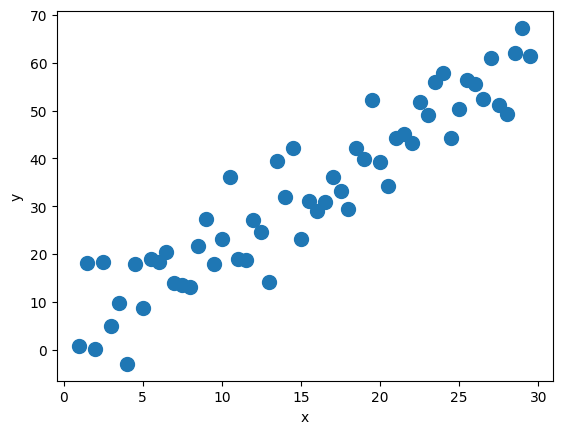

In [ ]:
x = np.arange(1,30,0.5)
y = 2*x + 1 # 기울기:2 / 절편:1

y_random = y + np.random.normal(0,8 ,len(x))

plt.xlabel("x")
plt.ylabel("y")
#plt.plot(x,y,".",markersize=20)
plt.plot(x,y_random,".",markersize=20)

In [ ]:
# 최소제곱 추정량 구하기
print("x = " , x)
print("y_random = " , y_random)

x =  [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5
 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.  28.5
 29.  29.5]
y_random =  [ 0.78141899 18.15681652  0.20936961 18.42210925  5.06818046  9.83194884
 -2.92554828 17.84928836  8.70332681 18.90536493 18.44187538 20.47826997
 14.00793633 13.56747062 13.03520402 21.60390671 27.31869557 17.91069834
 23.21220102 36.21528747 19.06105758 18.6746956  27.07785048 24.71604159
 14.18773887 39.38547094 32.01340965 42.10220986 23.18335729 31.04893555
 29.04440006 30.85214084 36.17601877 33.12850502 29.39124631 42.10562379
 39.85988433 52.1709368  39.17951237 34.23366534 44.27667055 45.00366184
 43.22296526 51.84380693 49.14593239 55.99212788 57.92090746 44.31614896
 50.40914136 56.41832893 55.60802164 52.34085249 60.91534337 51.19653238
 49.3299359  62.11021558 67.24

In [ ]:
Sxy = ((x - np.mean(x)) * (y_random - np.mean(y_random)))
Sxx = (x - np.mean(x)) ** 2
Sxy = Sxy.sum()
Sxx = Sxx.sum()

beta_1 =Sxy/Sxx # slope(기울기) = 2 근방에서 나와야 함
beta_0 = np.mean(y_random) - beta_1*np.mean(x) # intercept(절편) 1근방에서 나와야 함.

print("Slope = ", beta_1)
print("Intercept = " , beta_0)


Slope =  1.9692280981730936
Intercept =  2.67753414331294


In [ ]:
from sklearn.linear_model import LinearRegression

# sns.get_dataset_names()
mpg = sns.load_dataset("mpg")
mpg = mpg.loc[:,"mpg":"weight"]
mpg.head(10)

,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449
5,15.0,8,429.0,198.0,4341
6,14.0,8,454.0,220.0,4354
7,14.0,8,440.0,215.0,4312
8,14.0,8,455.0,225.0,4425
9,15.0,8,390.0,190.0,3850


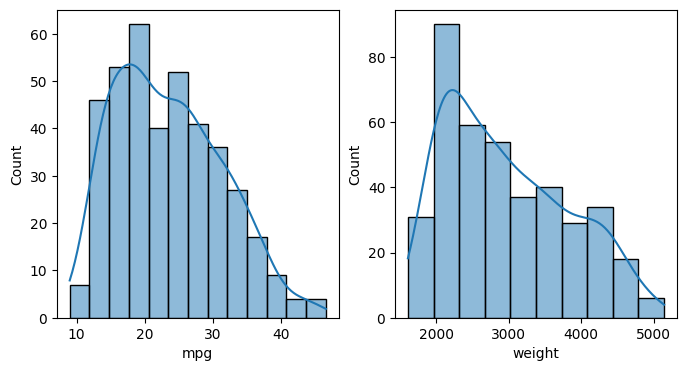

In [ ]:
# 회귀분석
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.histplot(data = mpg , x= "mpg" , kde=True)

plt.subplot(1,2,2)
sns.histplot(data = mpg , x= "weight" , kde=True)

plt.show()

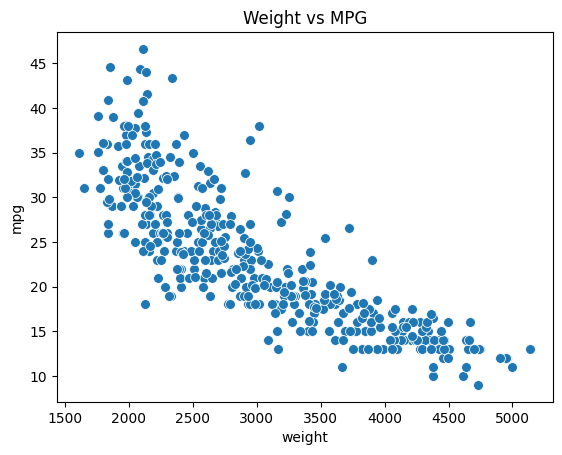

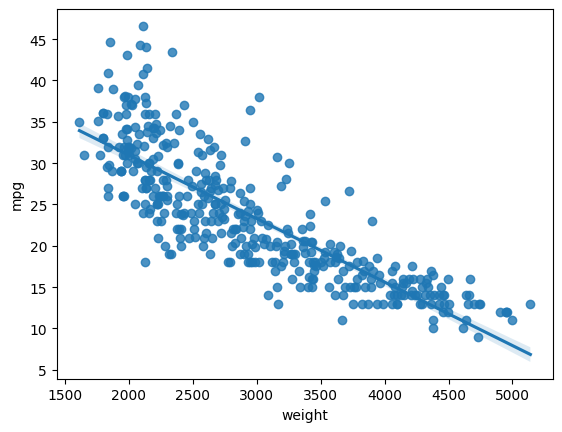

In [ ]:
plt.title("Weight vs MPG")
sns.scatterplot(data = mpg , x = "weight",y="mpg",s=50) # x=는 원인변수 , y는 타켓 (무게에 따른 연비를 구한다. 여기서 연비가 y)
plt.show()
sns.regplot(data = mpg , x = "weight",y="mpg") # x=는 원인변수 , y는 타켓 (무게에 따른 연비를 구한다. 여기서 연비가 y)
plt.show()

In [ ]:
# 여러개의 상관관계
# Series + Series = DataFrame
x = mpg[["weight"]] # feature
y = mpg["mpg"] # target : 실제로 구하고 싶은 값

In [ ]:
# 선형 회귀 모델
lr = LinearRegression()
lr.fit(x,y) # 최소 제곱 추정량 구하기 (위에는 손으로 일일이 구함)
print("coeff = " , lr.coef_) # 기울기
print("intercept = " , lr.intercept_) # 절편
print("R Square = " , round(lr.score(x,y)),3) # 0.69

coeff =  [-0.00764734]
intercept =  46.21652454901758
R Square =  1 3


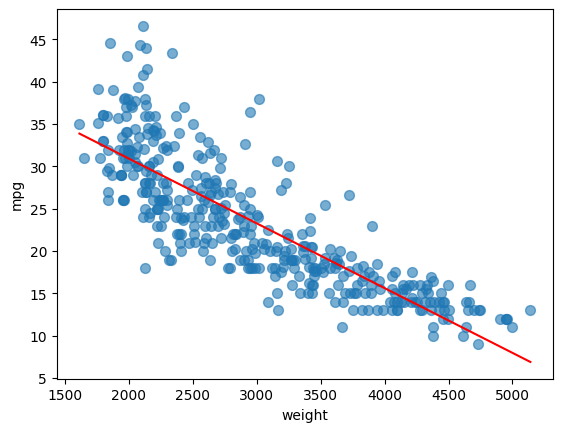

In [ ]:
# 회귀값을 구한 값을 실제 데이터 위에 안착시키기

start = x.min()
stop = x.max()
x_line = np.linspace(start,stop,10)
#print(x_line)
plt.scatter(x= "weight" , y = "mpg" , data = mpg, s = 50, alpha=0.6)
plt.plot(x_line , lr.coef_[0]* x_line + lr.intercept_ , c="r")
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()

In [ ]:
# 중회귀 분석 (Multiple linear regression)
mpg.dropna(inplace=True)
x = mpg.loc[:,"cylinders":"weight"]
y = mpg["mpg"]

lr = LinearRegression()
lr.fit(x,y) # ols 추정



LinearRegression()

In [ ]:
print("coeff = " , lr.coef_)
print("intercept = " , lr.intercept_)
print("r Square = " ,  lr.score(x,y))

coeff =  [-3.93285431e-01  1.38893129e-04 -4.28124811e-02 -5.27717310e-03]
intercept =  45.75677052214769
r Square =  0.7076520738329177


In [ ]:
# 도미/빙어 길이와 몸무게

# 도미 자료 (Bream Data) - 길이와 무게
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어 자료 (Smelt Data) - 길이와 무게
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

print("beam length = " , len(bream_length))
print("smelt_weight = " , len(smelt_weight))


beam length =  35
smelt_weight =  14


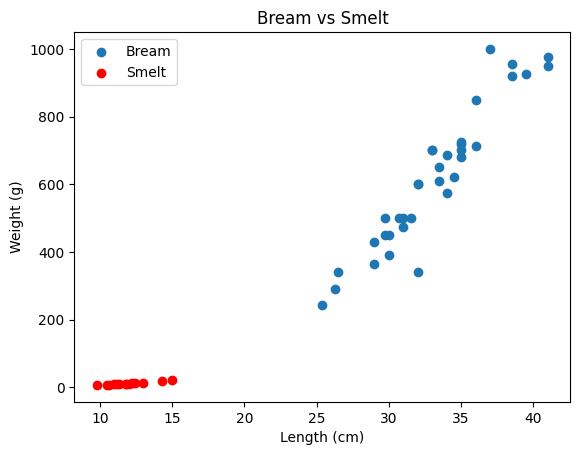

In [ ]:
plt.scatter(bream_length, bream_weight, label = "Bream")
plt.scatter(smelt_length, smelt_weight, c = "r", label = "Smelt")
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title("Bream vs Smelt")
plt.legend()
plt.show()


In [ ]:
# ----------------- 데이터 통합 및 타겟 설정 -----------------
# 도미와 빙어의 길이/무게 리스트를 하나로 합칩니다. (도미 자료가 먼저, 빙어 자료가 나중)
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

print("length = " , length , "\n", len(length))

# 사이킷런에 들어가는 형태로 도미+방어 리스트를 넣음
# dataFrame형태로 (series)
# feature데이터 (target은 없음)
fish_data = np.column_stack((length,weight))
#print(fish_data)
print("shape = " , fish_data.shape)

# target데이터는 없어서 생성해야함.
one_index = np.ones(len(bream_length)) # 내가 중요하다고 생각하는걸 1로 둠
zero_index = np.zeros(len(smelt_length))

fish_target = np.append(one_index,zero_index) # length를 만들때 도미+빙어 데이터를 합쳤음
print("shape = " , fish_target.shape)

length =  [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] 
 49
shape =  (49, 2)
shape =  (49,)


In [ ]:
# 훈련셋과 테스트셋 나누기
# fish_data와 fish_target을 훈련 세트와 테스트 세트로 나눕니다.
# train_size = 0.7: 훈련 세트 70% (34개), 테스트 세트 30% (15개)
# stratify=fish_target: 타겟 클래스(0과 1)의 비율을 유지하며 분할합니다. (편향 방지)
# random_state=42: 무작위 추출을 위한 시드값 설정 (결과 재현 가능하게 함)

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data , fish_target,train_size = 0.7, stratify=fish_target,random_state=42)
print('훈련자료 배열크기 = {0}, 테스트자료 배열크기 = {1}'.format(train_input.shape, test_input.shape))

훈련자료 배열크기 = (34, 2), 테스트자료 배열크기 = (15, 2)


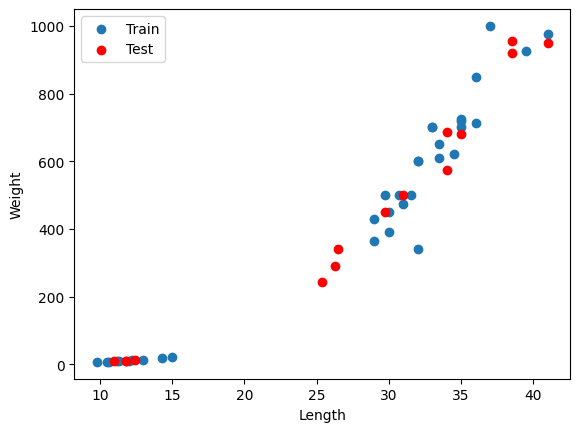

In [ ]:
# 훈련 세트(파란색)와 테스트 세트(빨간색)를 산점도로 시각화하여 분리된 상태를 확인합니다

plt.scatter(train_input[:, 0], train_input[:, 1], label = "Train")
plt.scatter(test_input[:, 0], test_input[:, 1], c = "r", label = "Test")
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5,p=2)

kn.fit(train_input, train_target) # 회귀분석에서도 답을주고 테스트데이터로 분석하고 predict로 예측하고

# 테스트 세트를 사용하여 모델의 정확도(score)를 평가합니다.
train_score = kn.score(train_input, train_target)
test_score= kn.score(test_input, test_target)
print(train_score,train_score)

# 새로운 데이터로 prediction

# 근처 5개를 찾아줌
distance , index = kn.kneighbors([[25,150]])
print("index = " , index)

1.0 1.0
index =  [[29 16 26  0 11]]


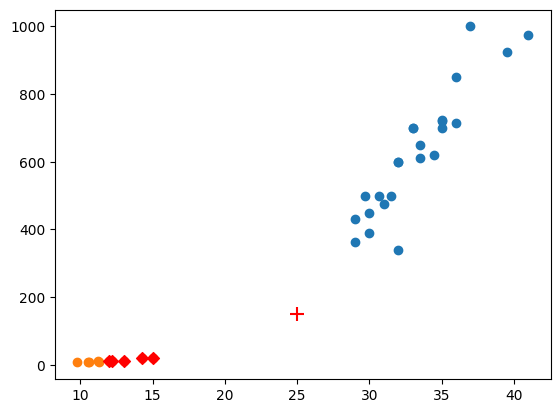

In [ ]:
bream_train = train_input[train_target == 1]
smelt_train = train_input[train_target == 0]

plt.scatter(bream_train[:, 0], bream_train[:, 1], label = "bream")
plt.scatter(smelt_train[:, 0], smelt_train[:, 1], label = "smelt")

plt.scatter(25,150,marker="+", s=100,c="r") # 눈으로 보면 bream인데 실제 데이터는 smelt가 나옴. 값들의 scale이 안맞아서 표준화 시켜줘야함. KNN은 반드시 해야함
plt.scatter(train_input[index,0],train_input[index,1],marker="D",c="r")

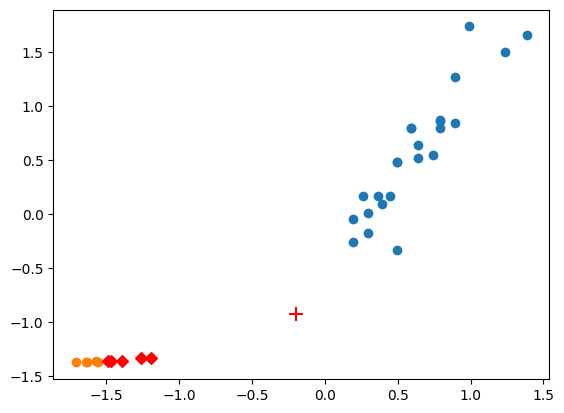

In [ ]:
# 표준화
mean = np.mean(train_input , axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean)/std

bream_train = train_scaled[train_target == 1]
smelt_train = train_scaled[train_target == 0]


new_scaled = ( [25,150] - mean)/std

plt.scatter(bream_train[:, 0], bream_train[:, 1], label = "bream")
plt.scatter(smelt_train[:, 0], smelt_train[:, 1], label = "smelt")

plt.scatter(new_scaled[0],new_scaled[1],marker="+", s=100,c="r") # 눈으로 보면 bream인데 실제 데이터는 smelt가 나옴. 값들의 scale이 안맞아서 표준화 시켜줘야함. KNN은 반드시 해야함


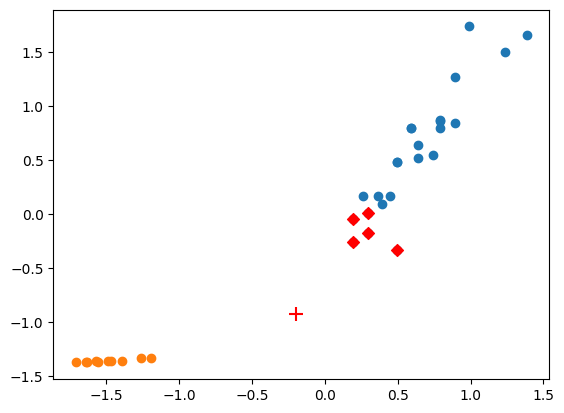

In [ ]:
kn = KNeighborsClassifier(n_neighbors=5,p=2)

kn.fit(train_scaled, train_target) # 회귀분석에서도 답을주고 테스트데이터로 분석하고 predict로 예측하고

train_distance , train_index = kn.kneighbors([new_scaled])

plt.scatter(bream_train[:, 0], bream_train[:, 1], label = "bream")
plt.scatter(smelt_train[:, 0], smelt_train[:, 1], label = "smelt")
plt.scatter(new_scaled[0],new_scaled[1],marker="+", s=100,c="r") # 눈으로 보면 bream인데 실제 데이터는 smelt가 나옴. 값들의 scale이 안맞아서 표준화 시켜줘야함. KNN은 반드시 해야함


plt.scatter(train_scaled[train_index,0],train_scaled[train_index,1],marker="D",c="r")
plt.show()

In [ ]:
prediction = kn.predict([new_scaled])
print(prediction)

proba = kn.predict_proba([new_scaled])
print(f"예측 확률 (빙어/도미): {proba}")

[1.]
예측 확률 (빙어/도미): [[0. 1.]]
